In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline 
from scipy.misc import derivative
#new stuff 7/9 for automating process
import os
import os.path
from pathlib2 import Path
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.weight':'medium', 
         'xtick.major.size':8,
         'ytick.major.size':8}
pylab.rcParams.update(params)
black = '#000000'
yellow = '#F0F442'
orange = '#ec7f31'
#gold = '#E69F00'
gold = '#f0bd24'
green = '#009E73'
dblue = '#0072B2'
lblue = '#56B4E9'
pink = '#F6BBCA'
red = '#FF3442'
purple = '#4f0069'
lgreen = '#00ff99'
c = [purple, red, orange, gold, yellow, green, lgreen, dblue, lblue, pink]
bl = '#0000ff'
pu = '#8c1aff'
bg = '#00cc66'
cy = '#00ccff'
pi = '#ff66ff'
re = '#990033'
ora = '#ff704d'
ye = '#ffff66'
gr = '#99ff99'
pal = [bl, pu, bg, cy, pi, re, ora, ye, gr]

In [3]:
Laup_data = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20/SA20-3_100ns/rmsf/rmsf_LAUP.xvg', skip_header=17)
Step_data = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20/SA20-3_100ns/rmsf/rmsf_STEP.xvg', skip_header=17)
Palp_data = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20/SA20-3_100ns/rmsf/rmsf_PALP.xvg', skip_header=17)
Myrp_data = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20/SA20-3_100ns/rmsf/rmsf_MYRP.xvg', skip_header=17)

In [38]:
LA_data = np.genfromtxt('/gpfs/amarolab/monolayers/LAUP_NaCl0.4_GMX/SA20-1_100ns/rmsf/rmsf.xvg', skip_header=17)[:,1]
data = []
for i in combined_data:
    if i > np.mean(combined_data)+2*(np.std(combined_data)):
        continue
    else:
        data.append(i)
print(len(data))
print(len(LA_data))
print(len(combined_data))

17708
13680
17784


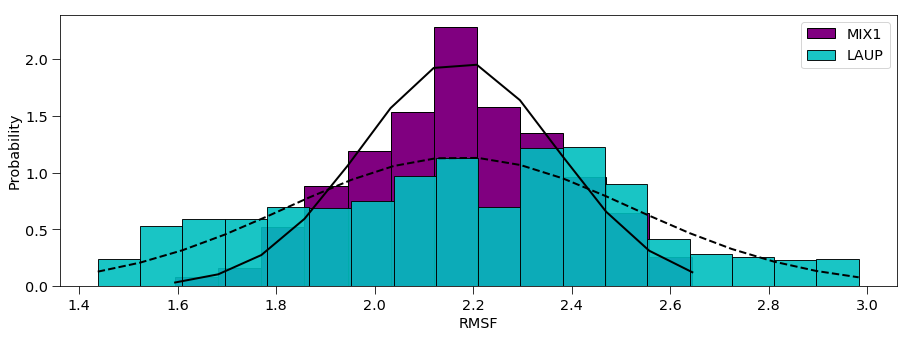

In [56]:
#combine data
#datas = Laup_data[:,1]
#print(data)
combined_data = np.append(Laup_data[:,1], Step_data[:,1])
combined_data = np.append(combined_data, Palp_data[:,1])
combined_data = np.append(combined_data, Myrp_data[:,1])
#print(combined_data)
#print(len(combined_data))
#plt.hist(combined_data, bins=30)
#plt.hist(LA_data, bins=12)
#print(Laup_data[0])
nP, bP, pP = plt.hist(data, 12, normed=1, color='purple', label='MIX1', edgecolor='k')
nL, bL, pL = plt.hist(LA_data, 18, normed=1, color='c', label='LAUP', edgecolor='k', alpha=0.9)
yL = mlab.normpdf(bL, np.mean(LA_data), np.std(LA_data))
yP = mlab.normpdf(bP, np.mean(data), np.std(data))
lP = plt.plot(bP, yP, 'k', linewidth=2)
lL = plt.plot(bL, yL, 'k--', linewidth=2)
plt.legend(loc=1)
plt.xlabel('RMSF')
plt.ylabel('Probability')
plt.savefig('/home/adommer/Desktop/RMSF_dist.png', dpi=300)

In [45]:
print(np.std(data))
print(np.mean(data))
print(np.std(LA_data))
print(np.mean(LA_data))

0.2014442896
2.17025363113
0.351411898323
2.17111731725


In [54]:
MIX1_data = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/rmsf/rmsf.xvg', skip_header=17)

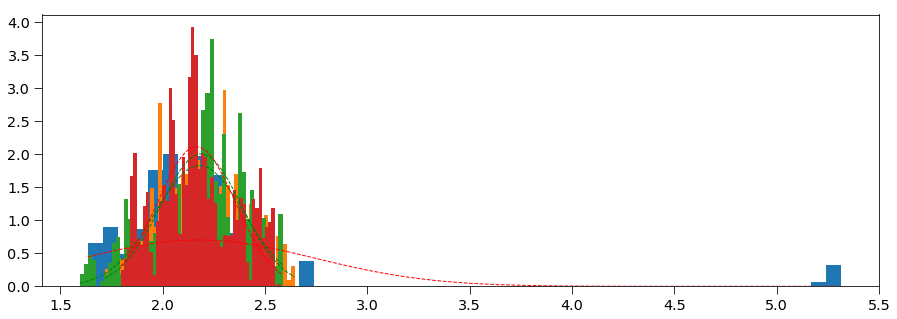

In [194]:
nL, bL, pL = plt.hist(Laup_data[:,1], 50, normed=1)
nP, bP, pP = plt.hist(Palp_data[:,1], 50, normed=1)
nM, bM, pM = plt.hist(Myrp_data[:,1], 50, normed=1)
nS, bS, pS = plt.hist(Step_data[:,1], 50, normed=1)
yL = mlab.normpdf(bL, np.mean(Laup_data[:,1]), np.std(Laup_data[:,1]))
yP = mlab.normpdf(bP, np.mean(Palp_data[:,1]), np.std(Palp_data[:,1]))
yM = mlab.normpdf(bM, np.mean(Myrp_data[:,1]), np.std(Myrp_data[:,1]))
yS = mlab.normpdf(bS, np.mean(Step_data[:,1]), np.std(Step_data[:,1]))

lP = plt.plot(bP, yP, 'g--', linewidth=1)
lL = plt.plot(bL, yL, 'r--', linewidth=1)
lM = plt.plot(bM, yM, 'g--', linewidth=1)
lS = plt.plot(bS, yS, 'r--', linewidth=1)

In [111]:
print(np.argmax(yP), np.max(yP))
print(np.argmax(yL), np.max(yL))
print(np.argmax(yM), np.max(yM))
print(np.argmax(yS), np.max(yS))

(25, 2.0047055866740533)
(7, 0.70207768146202798)
(30, 1.829332343706551)
(24, 2.1136328590486375)


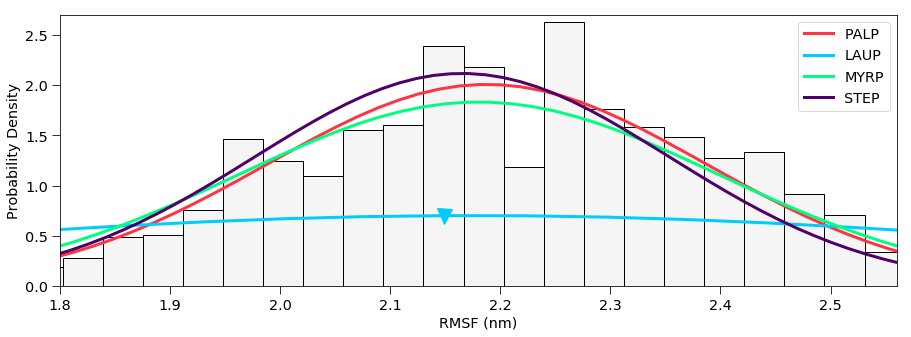

In [150]:
plt.figure(figsize=(4,6))
fig, axs = plt.subplots()
plt.hist(MIX1_data[:,1],100, normed=1, color='whitesmoke', edgecolor='black')
lP = plt.errorbar(bP, yP, marker='None', linewidth=3, color=red, label='PALP')
#plt.errorbar(bP[25], np.arange(0, 5), lw=2, color=red)
lL = plt.errorbar(bL, yL, marker='None', linewidth=3, color=cy, label='LAUP')
plt.plot(bL[7]+((bL[7]-bL[7])/2), yL[7], marker='v', ms=15, color=cy)
#plt.errorbar(bL[7], np.arange(0, 5), lw=2, color=cy)
lM = plt.errorbar(bM, yM, marker='None', linewidth=3, color='springgreen', label='MYRP')
#plt.errorbar(bM[30], np.arange(0, 5), lw=2, color=gr)
lS = plt.errorbar(bS, yS, marker='None', linewidth=3, color=purple, label='STEP')
#plt.errorbar(bS[np.argmax(yS)], np.arange(0, 5), lw=2, color=purple)
plt.legend(loc=1)
plt.xlabel('RMSF (nm)')
plt.ylabel('Probability Density')
axs.set_xlim(1.8,2.56)
axs.set_ylim(0, 2.7)
plt.savefig('/home/adommer/Desktop/rmsf_sa20.png', dpi=300)

In [131]:
LA_data = np.genfromtxt('/gpfs/amarolab/monolayers/LAUP_NaCl0.4_GMX/SA20_100ns/rmsf/rmsf.xvg', skip_header=17)

(14, 1.1345362664436101)


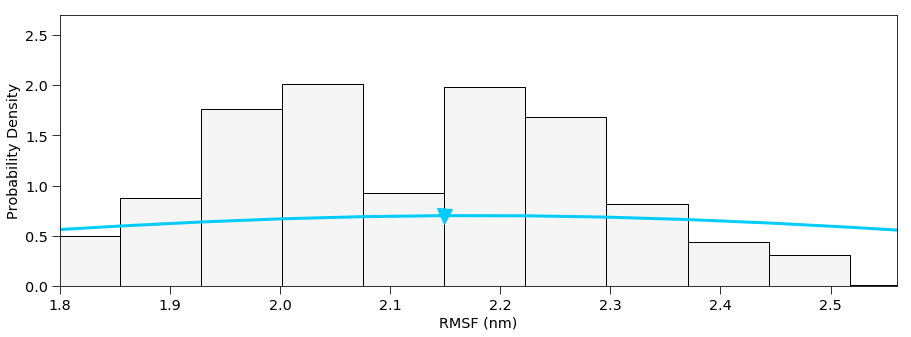

In [195]:
#nLA, bLA, pLA = plt.hist(LA_data[:,1], 30, normed=1, color='whitesmoke', edgecolor='k', alpha=1.0)
nL, bL, pL = plt.hist(Laup_data[:,1], 50, normed=1, color='whitesmoke', edgecolor='k', alpha=1.0)

#yLA = mlab.normpdf(bLA, np.mean(LA_data[:,1]), np.std(LA_data[:,1]))
#lLA = plt.errorbar(bLA, yLA, color=cy, marker='None', linewidth=3, label='LAUP')
lL = plt.errorbar(bL, yL, marker='None', linewidth=3, color=cy, label='LAUP')
plt.plot(bL[7]+((bL[7]-bL[7])/2), yL[7], marker='v', ms=15, color=cy)
#plt.plot(bLA[14]+((bLA[15]-bLA[14])/2), yLA[14], marker='v', ms=15, color=cy)

plt.xlabel('RMSF (nm)')
plt.ylabel('Probability Density')
plt.xlim(1.8, 2.56)
plt.ylim(0, 2.7)
print(np.argmax(yLA), np.max(yLA))
plt.savefig('/home/adommer/Desktop/laup_only_bottom.png', dpi=300)

In [196]:
print(bL[7]+((bL[7]-bL[7])/2))

2.149302


In [198]:
print(bLA[14]+((bLA[15]-bLA[14])))

2.2101
